In [1]:
#Amplitude calculation 
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.image as mpimg
import os, copy, time, pickle
from urllib.request import urlretrieve
import scipy.integrate
solve_ivp = scipy.integrate.solve_ivp
import os
import json
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import h5py as h5
import glob

from Utils import get_avg_AMP, get_scale, find_amp_index #,get_AMP

In [2]:
FILE = 'Trajectories400.hdf5' 

In [3]:
def load_data(file):   
    f = h5.File(file, 'r')
    data = np.array(f['Dataset1'][:,:,0:2])
    return data

In [4]:
def load_data_2(data):
    data2 = []
    for i in range(len(data)):
        if (i % 20) == 0: #display only even traj 
            data2.append(data[i,:,:])
    data2 = np.array(data2)
    return data2         

In [5]:
# data = load_data_2(data0)
# print(np.shape(data))
# print(type(data))

In [6]:
#euclid dist from one node to the origin  
def get_dist(data): 
    dist = []
    for i in range(len(data)): #first loop goes into each trajecotry "sheet"
        dist2=[]
        for j in range(len(data[i])):#second loop goes into seach trajectory "row" which holds an (x,y)
            temp = np.sqrt((data[i, j, 0]) ** 2 + (data[i, j, 1]) ** 2) #distance from the origin to the point 
            dist2.append(temp)
        dist.append(dist2)
    dist = np.array(dist) 
    return dist  

In [7]:
#euclid dist from one node to the next 
def get_dist_1(data): 
    dist = []
    for i in range(len(data)): #first loop goes into each trajecotry "sheet"
        dist2=[]
        for j in range(len(data[i])):#second loop goes into seach trajectory "row" which holds an (x,y)
            #print(j)
            if j < 999:
                temp = np.sqrt((data[i, j+1, 0]- data[i, j, 0]) ** 2 + (data[i, j+1, 1]- data[i, j, 1]) ** 2) #distance from a node to the next 
                dist2.append(temp)
            if j == 999: 
                temp = np.sqrt((data[i, 0, 0]- data[i, j, 0]) ** 2 + (data[i, 0, 1]- data[i, j, 1]) ** 2) #distance from a node to the next 
                dist2.append(temp)
        dist.append(dist2)
    dist = np.array(dist) 
    return dist  

In [8]:
data = load_data(FILE)

(400, 1000)
20 0.3200433074449018
40 0.6425546734870571
60 0.9680268298924685
80 1.29698132774484
100 1.6304498764469293
120 1.9168492866788753
140 2.305968029193516
160 2.655883482411591
180 3.011449203442957
200 3.377740615474161
220 3.7538365569509717
240 4.146610264374948
260 4.557985681007158
280 5.008523194822497
300 5.7006368928160995
320 5.687477186106457
340 6.69044759672808
360 103.5716151927758
380 109.15710249464769


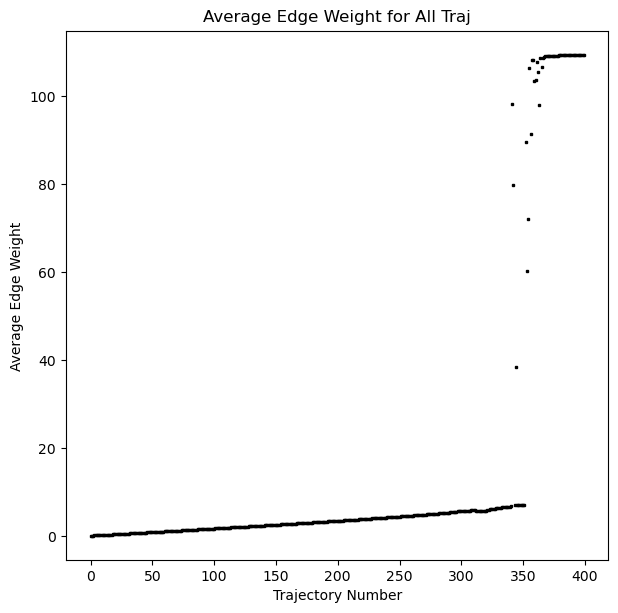

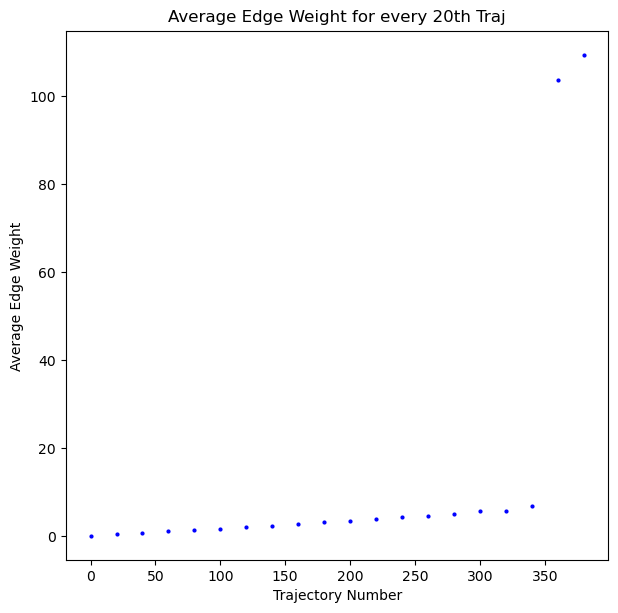

In [23]:
#plt mean of each traj 
Dist_0 = get_dist(data)
print(np.shape(Dist_0))

fin_dist=[]
for i in range(len(Dist_0)):
    temp = np.mean(Dist_0[i])
    fin_dist.append(temp)

for i in range(len(Dist_0)):
    if (i % 20) == 0:
        if i != 0:
            print(i , fin_dist[i])

#plotting all Average edge weight for all Trajectories 

tpad = 7
plt.figure(figsize=[7,7], dpi=100)
plt.title('Average Edge Weight for All Traj', pad=tpad) 
plt.xlabel('Trajectory Number') 
plt.ylabel('Average Edge Weight') 
plt.plot(fin_dist, 'ks', label='?', markersize = 2)
plt.savefig(os.path.join("/global/u2/m/mmeitz/FRNN/All_Traj_EW.png"))
plt.show()
plt.close()


plt.figure(figsize=[7,7], dpi=100)
plt.title('Average Edge Weight for every 20th Traj', pad=tpad) 
plt.xlabel('Trajectory Number') 
plt.ylabel('Average Edge Weight') 

for i in range(len(fin_dist)):
    if (i % 20) == 0:
        plt.plot(i, fin_dist[i], 'ob', label='?', markersize = 2)

plt.savefig(os.path.join("/global/u2/m/mmeitz/FRNN/Chosen_Traj_EW.png"))
plt.show()
plt.close()

(400, 1000)
[  0  20  40  60  80 100 120 140 160 180 200 220 240 260 280 300 320 340
 360 380]


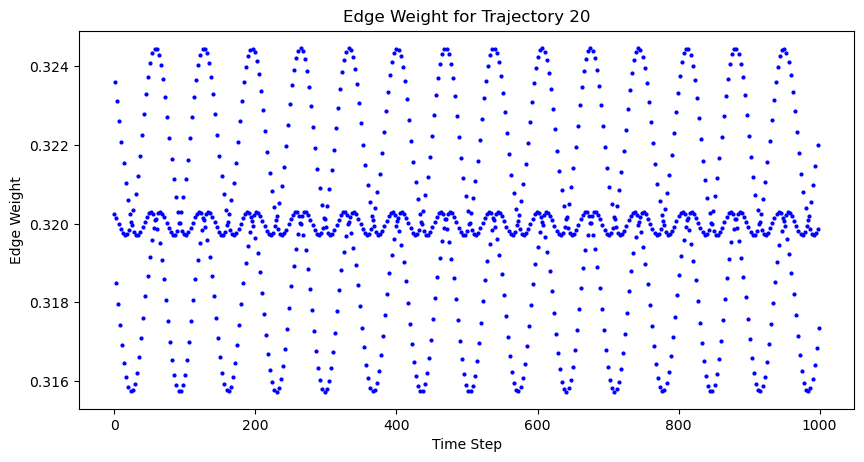

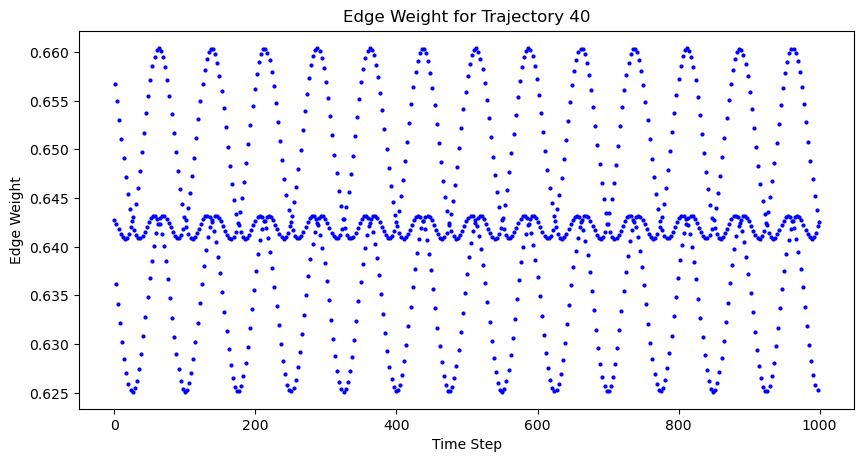

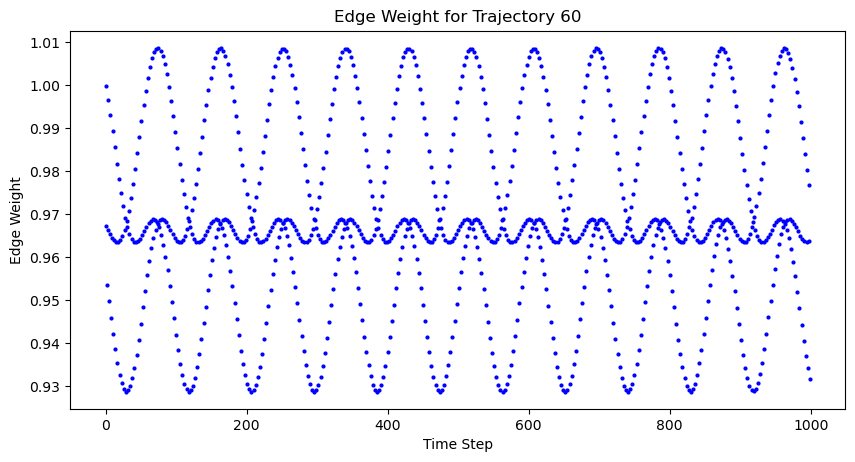

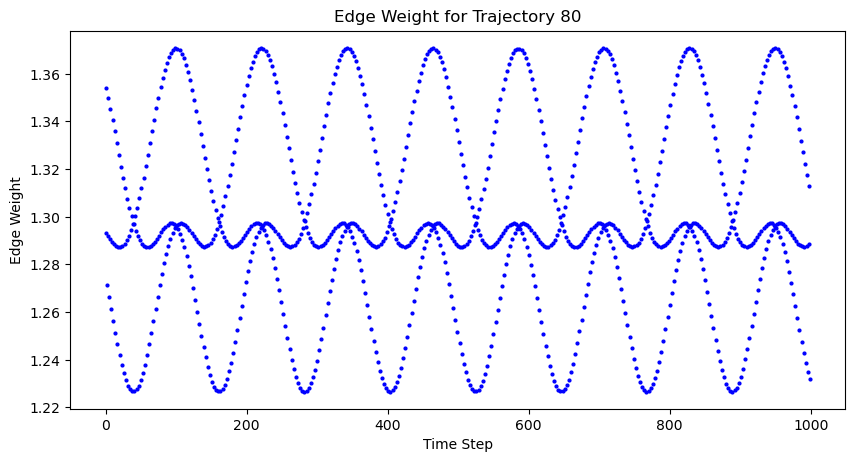

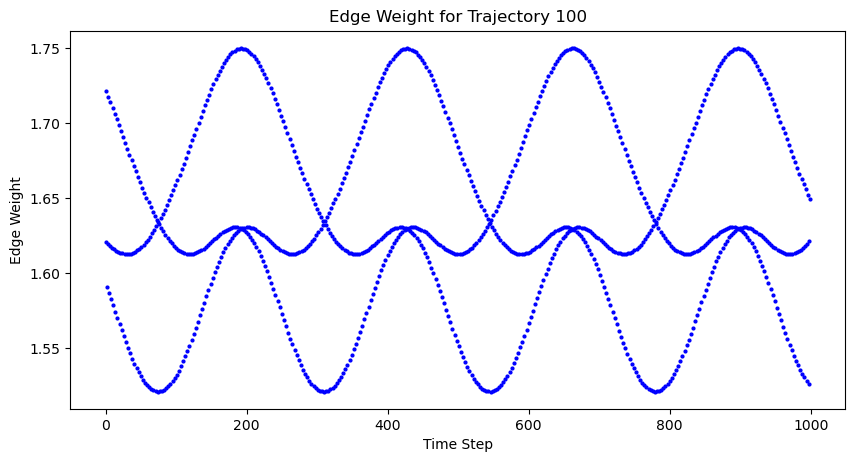

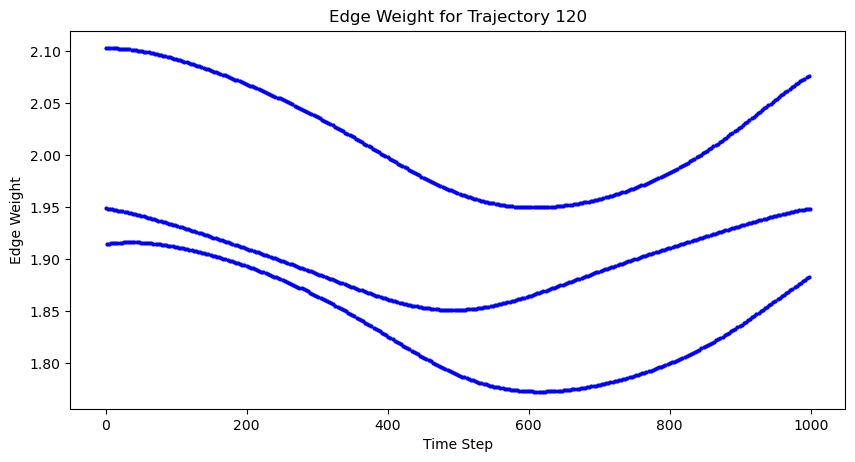

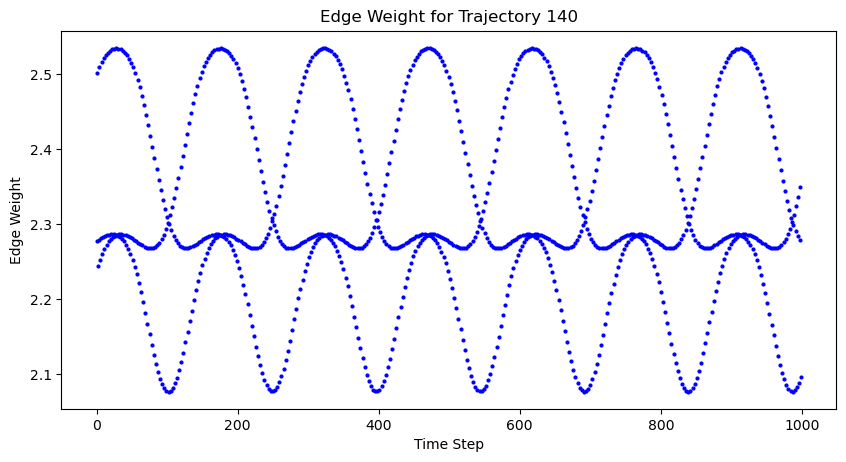

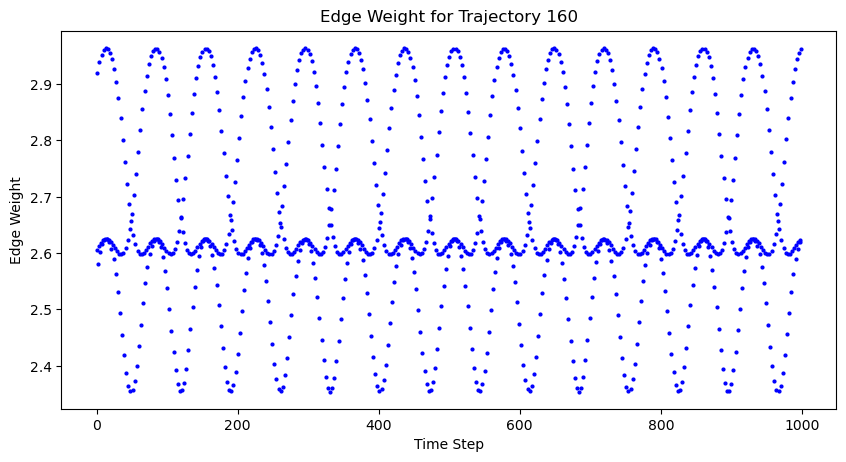

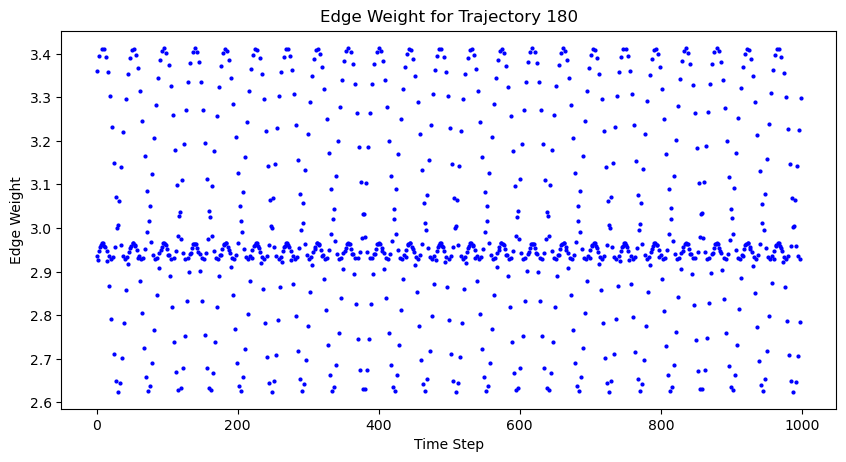

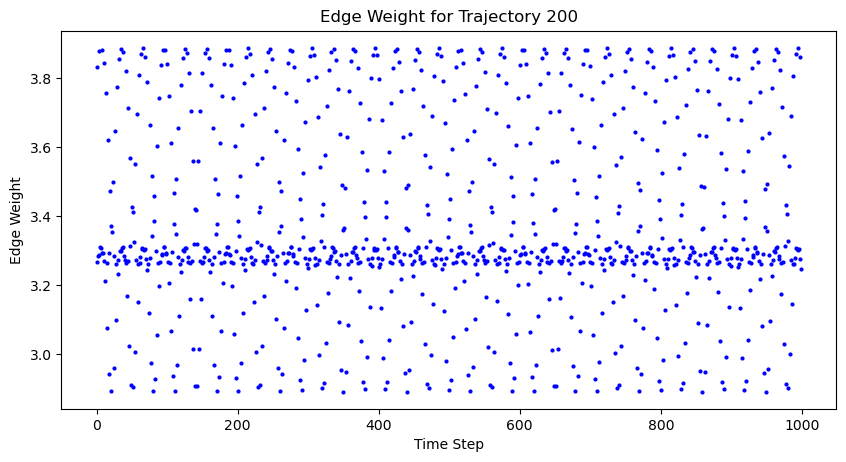

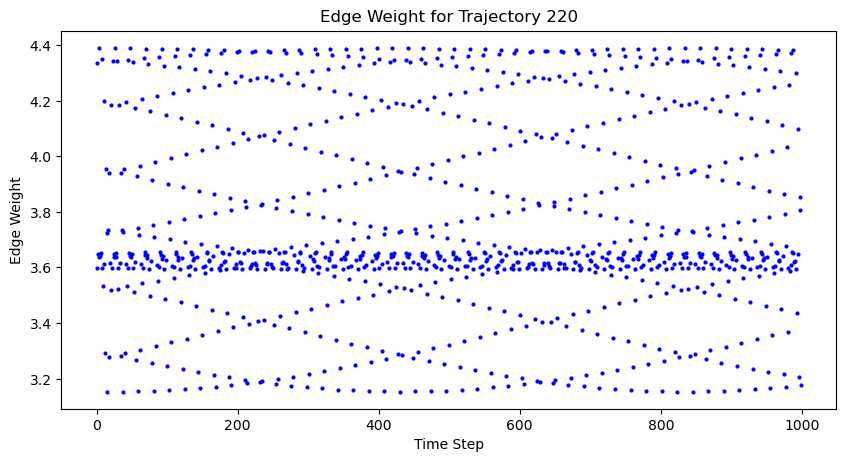

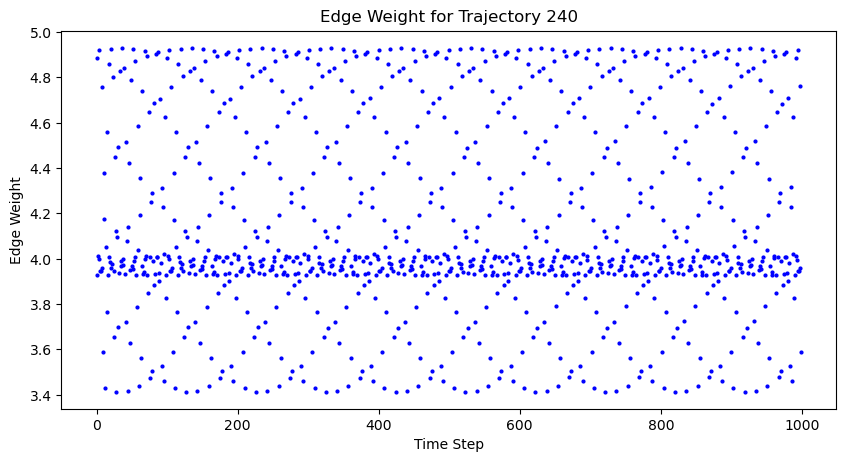

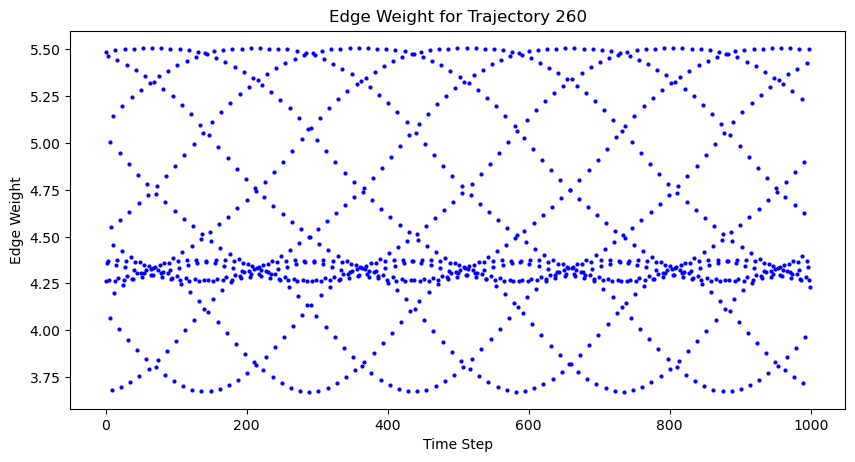

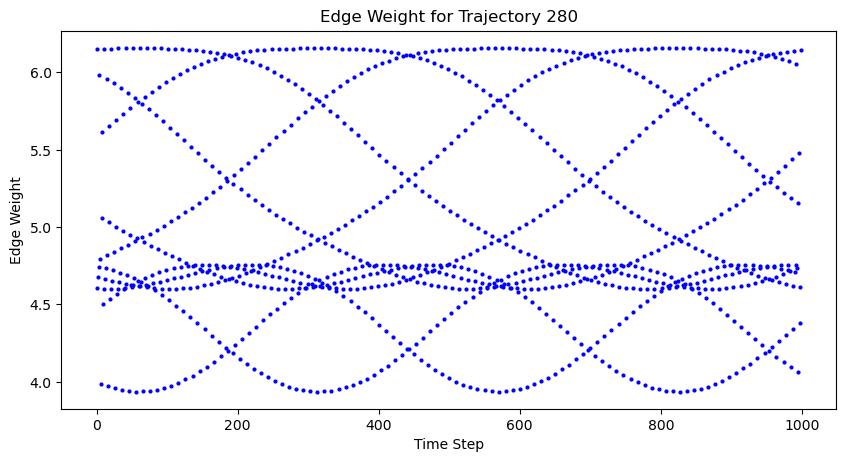

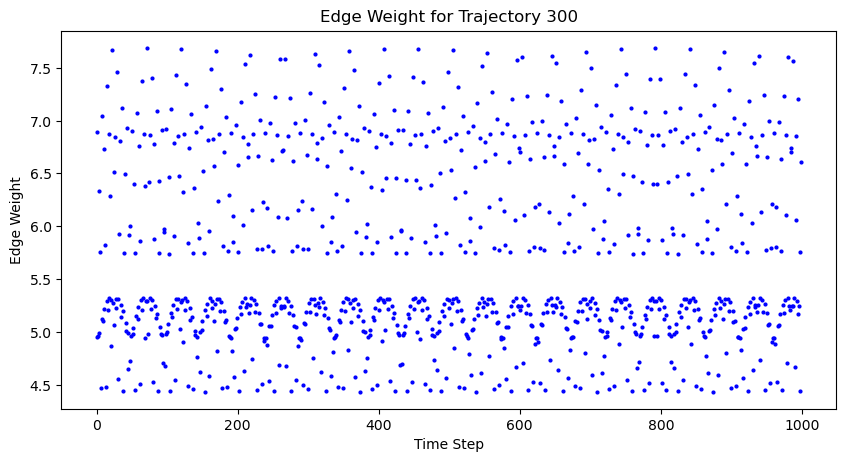

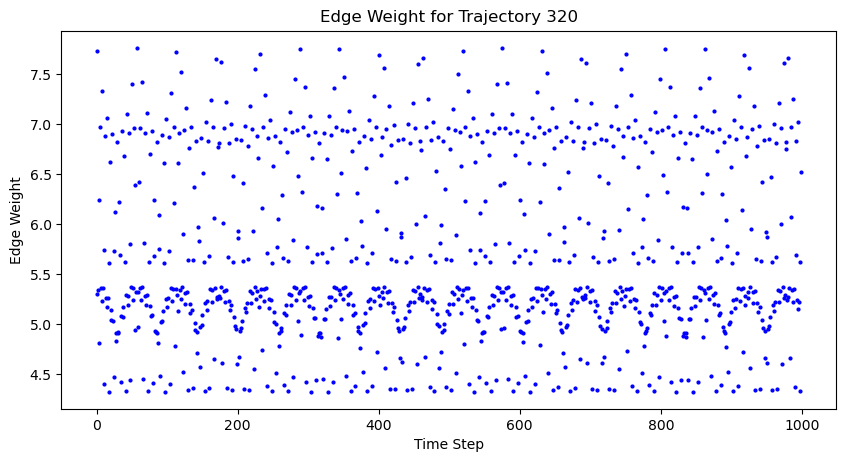

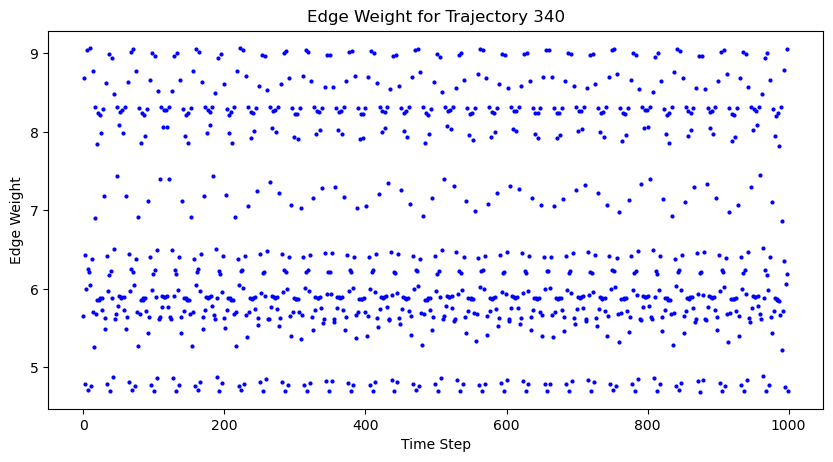

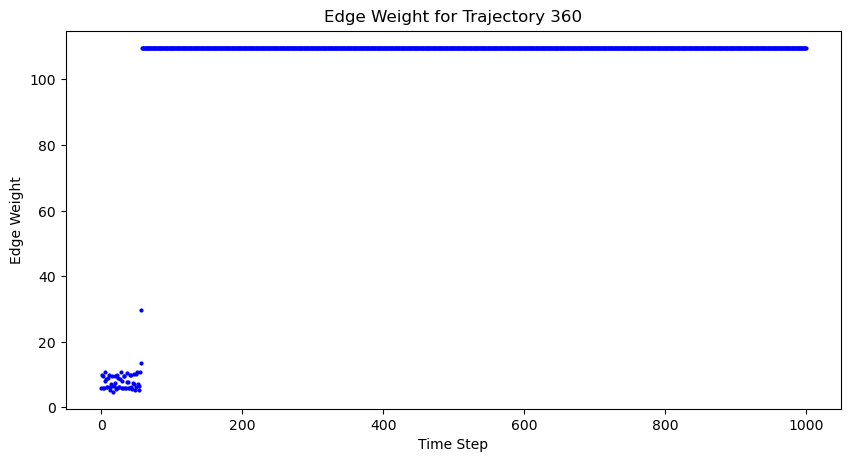

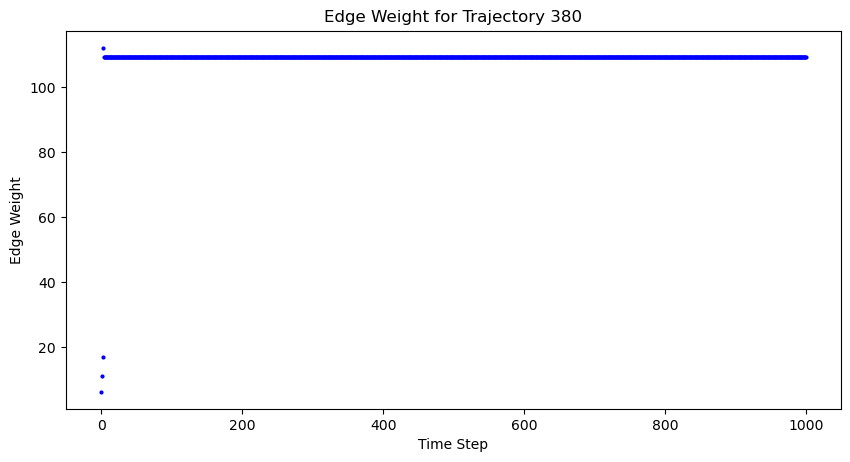

In [10]:
#plotting edge weight from one node to the next, in sucession (USE THIS ONE)
Dist_1 = get_dist(data)
print(np.shape(Dist_1))

traj_list = np.array(range(400))
traj_list2 = traj_list[0::20]
print(traj_list2)

for i in traj_list:
    #print(traj_list[i])
    if (i % 20) == 0:
        if i != 0:
            tpad = 7
            plt.figure(figsize=[10,5], dpi=100)
            plt.title('Edge Weight for Trajectory %s' %i, pad=tpad) 
            plt.xlabel('Time Step') 
            plt.ylabel('Edge Weight') 
            plt.plot(Dist_1[i], 'ob', markersize = 2)
            #plt.savefig(os.path.join("/global/u2/m/mmeitz/FRNN/Traj_{0}_EW.png".format(str(i).zfill(3))))
            plt.show()
            plt.close()
    
#     for i, txt in enumerate(traj_list):
#         plt.annotate(txt, (x[i], y[i]))
    

<class 'numpy.ndarray'>


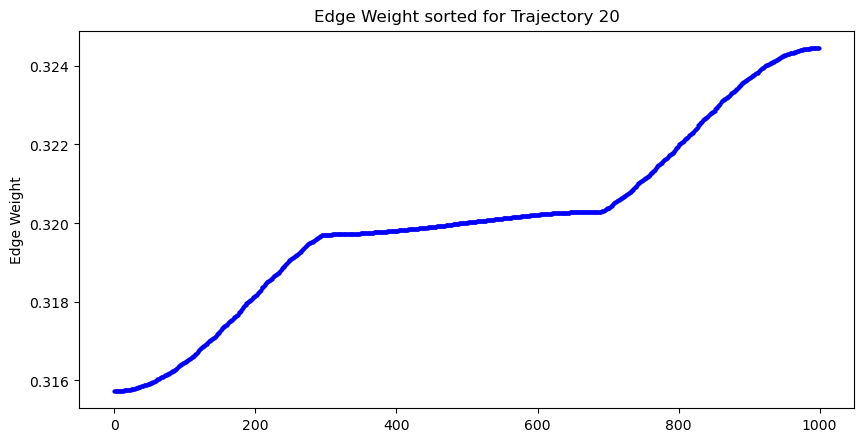

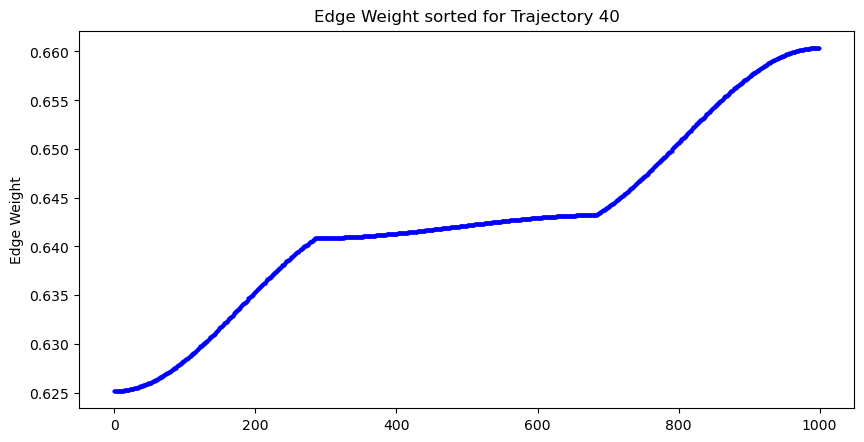

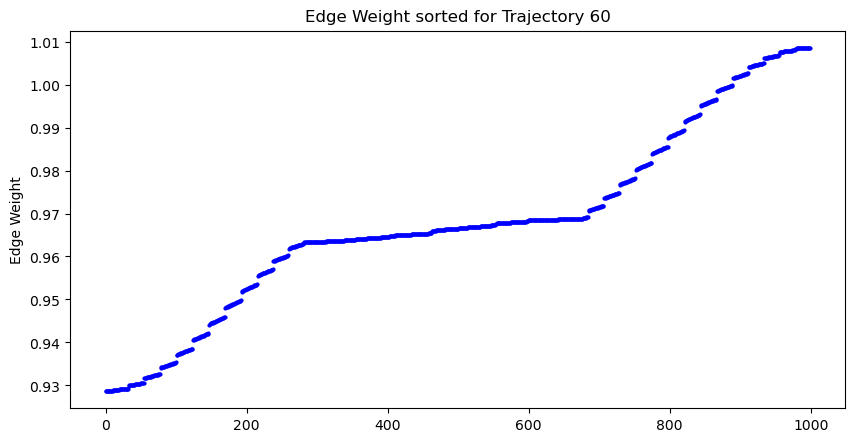

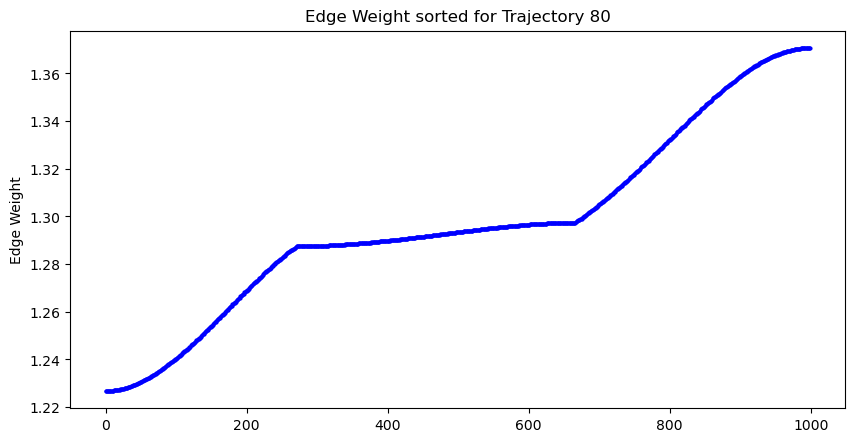

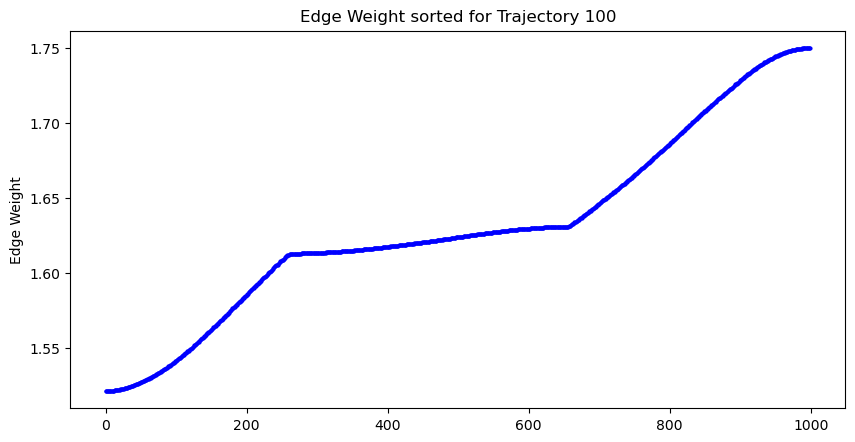

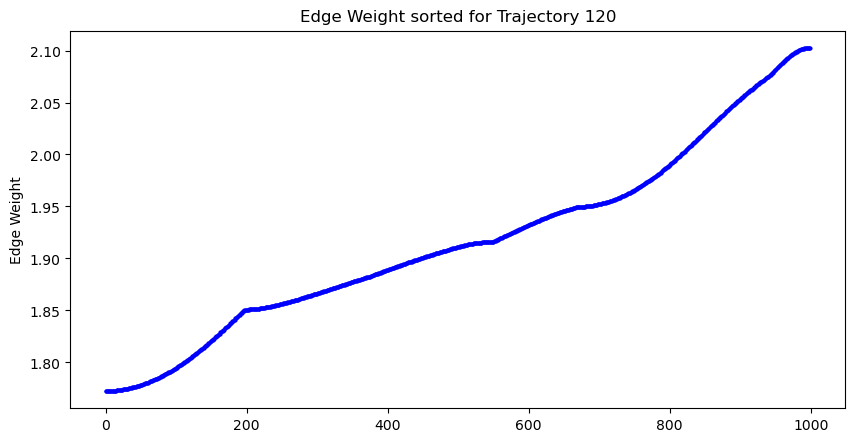

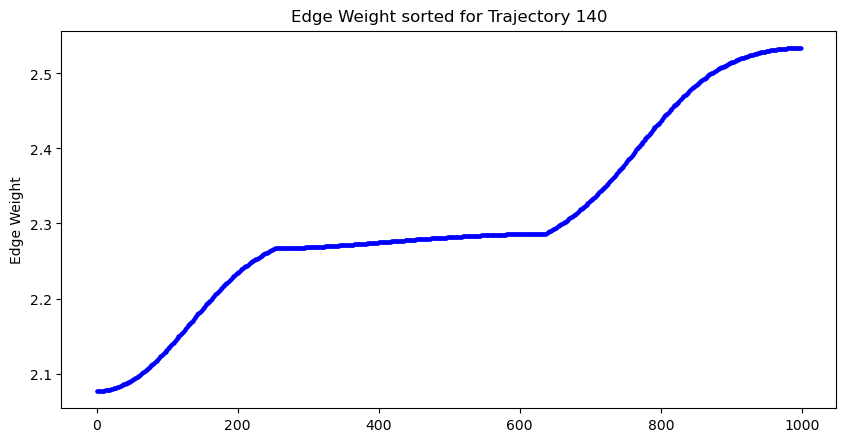

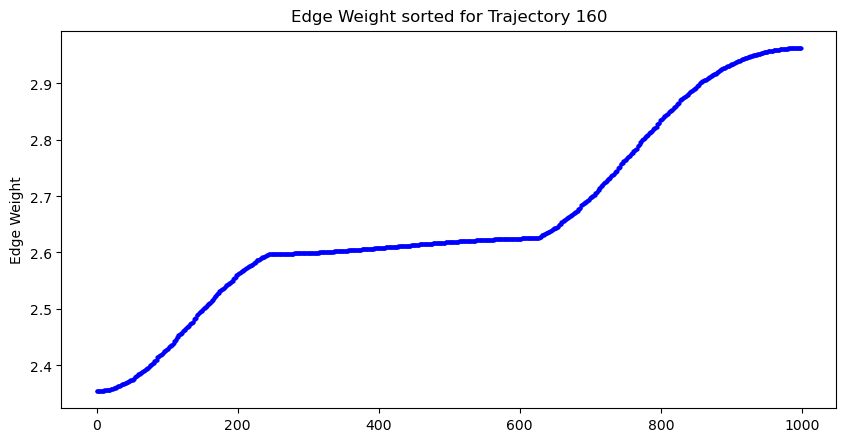

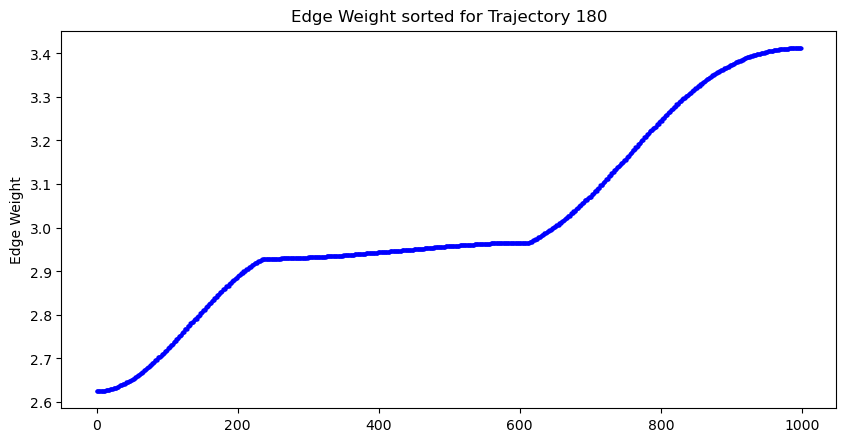

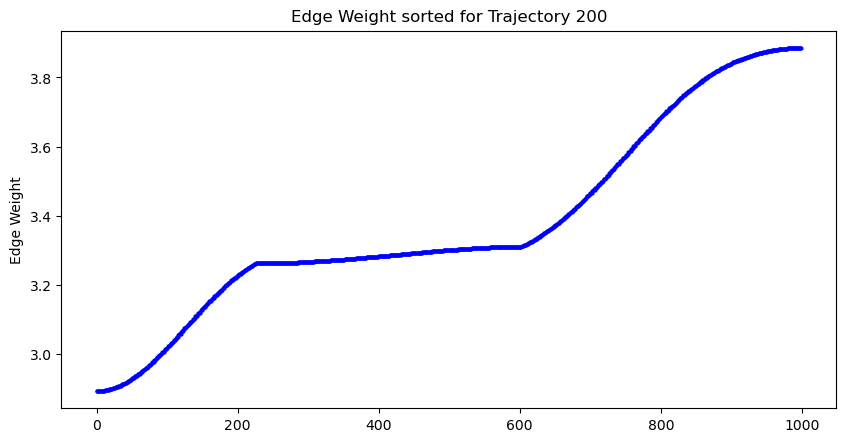

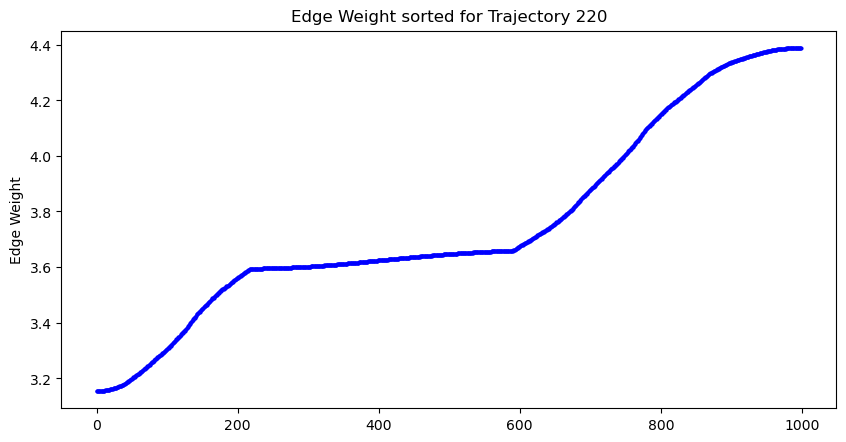

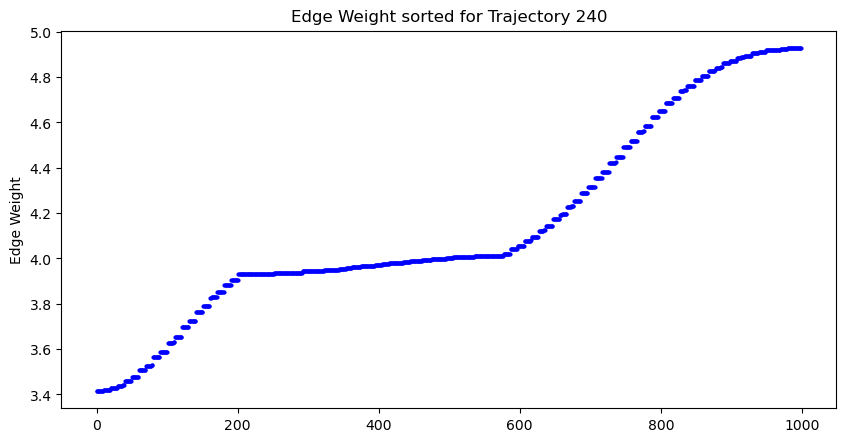

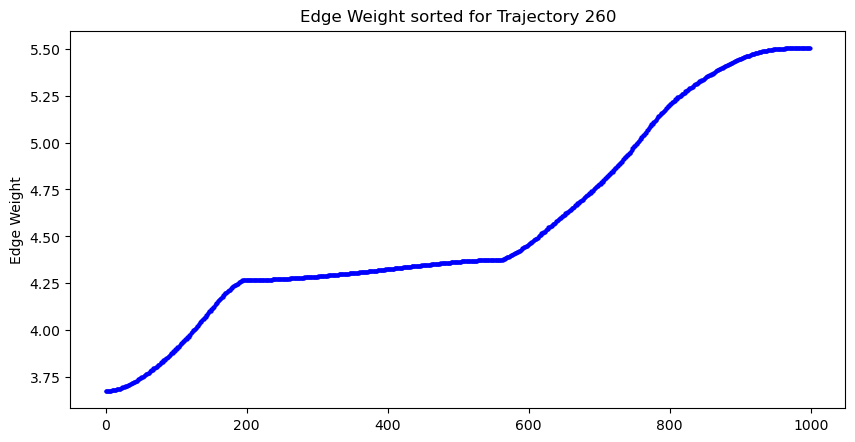

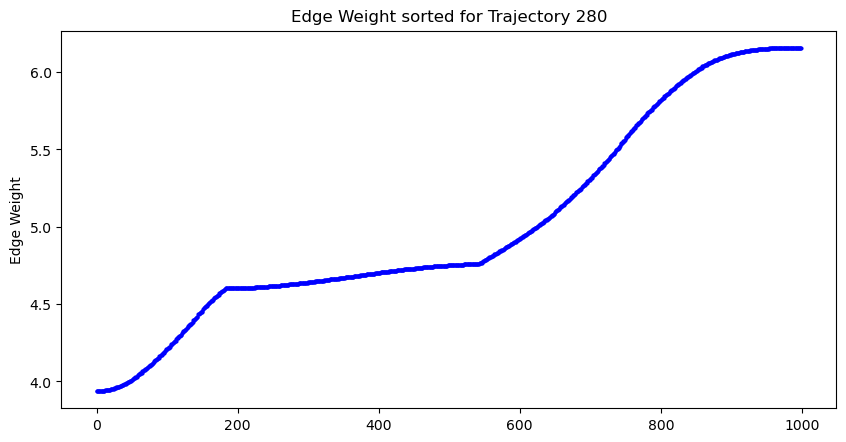

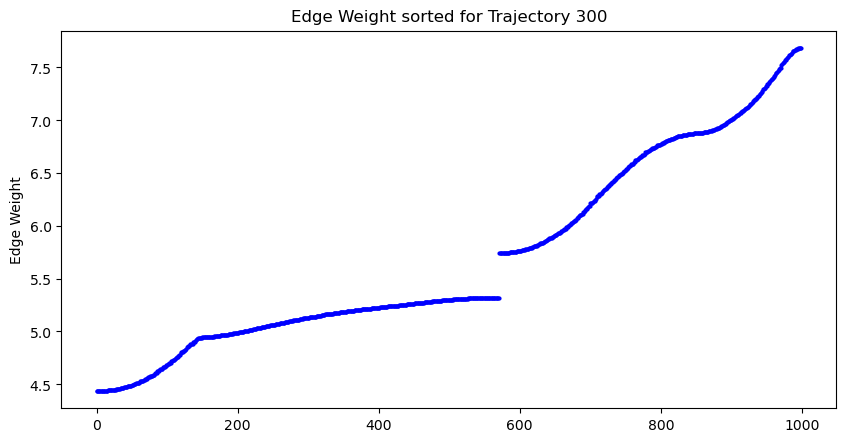

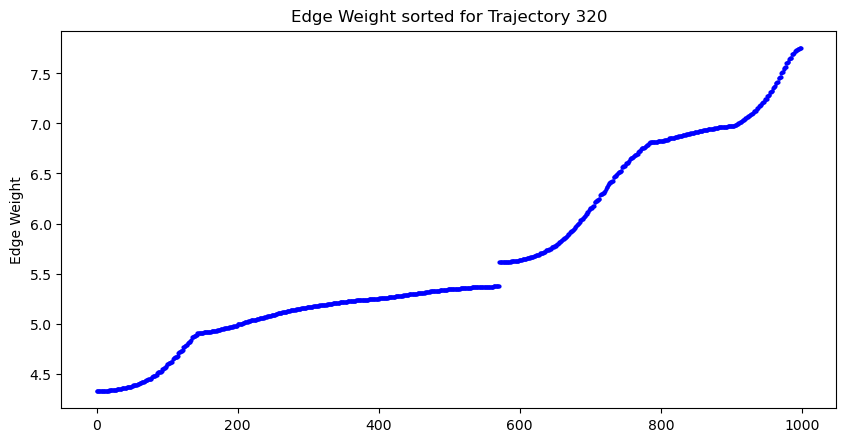

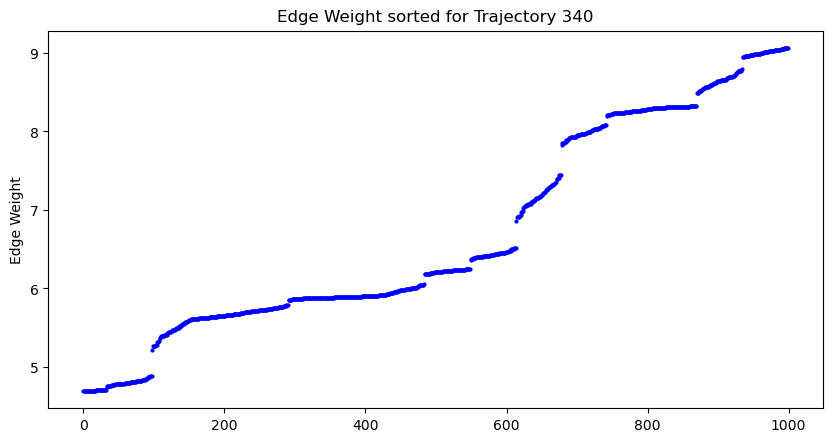

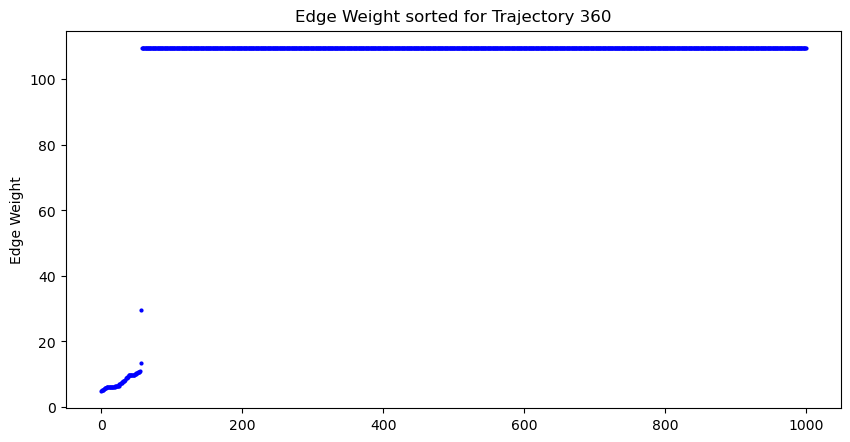

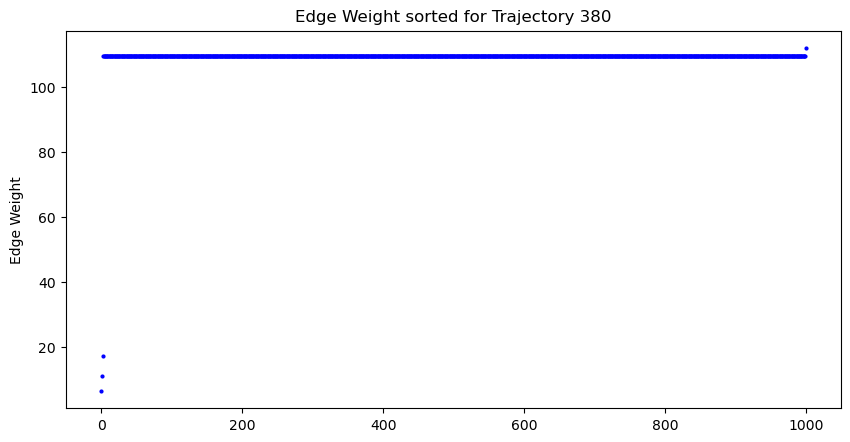

In [14]:
#plotting edge weight from one node to the next, in sucession (USE THIS ONE)
Dist_1 = get_dist(data)
print(type(Dist_1))
#print(Dist_1[1])
new_arr = [sorted(x) for x in Dist_1]
#print(new_arr[1])

traj_list = np.array(range(400))
traj_list2 = traj_list[0::20]

for i in traj_list:
    #print(traj_list[i])
    if (i % 20) == 0:
        if i != 0:
            Dist_1.sort
            #print(Dist_1[i].sort())
            tpad = 7
            plt.figure(figsize=[10,5], dpi=100)
            plt.title('Edge Weight sorted for Trajectory %s' %i, pad=tpad) 
            #plt.ylabel('Time Step') 
            plt.xlabel('Edge Weight') 
            plt.plot(new_arr[i], 'ob', markersize = 2)
            plt.savefig(os.path.join("/global/u2/m/mmeitz/FRNN/Traj_{0}_EW_sorted.png".format(str(i).zfill(3))))
            plt.show()
            plt.close()

<class 'numpy.ndarray'>
[824 224 357 691 957  91 490 558  23 623 425 156 892 756 292 289 759 889
 159 422 626  26 555 493  88 960 688 360 221 827 821 227 354 694 954  94
 487 561  20 620 428 153 895 753 295 286 762 886 162 419 629  29 552 496
  85 963 685 363 218 830 818 230 351 697 951  97 484 564  17 617 431 150
 898 750 298 283 765 883 165 416 632  32 549 499  82 966 682 366 215 833
 815 233 348 700 948 100 481 567  14 614 434 147 901 747 301 280 768 880
 168 413 635  35 546 502  79 969 679 369 212 836 812 236 345 703 945 103
 478 570  11 611 437 144 904 744 304 277 771 877 171 410 638  38 543 505
  76 972 676 372 209 839 809 239 342 706 942 106 475 573   8 608 440 141
 907 741 307 274 774 874 174 407 641  41 540 508  73 975 673 375 206 842
 806 242 339 709 939 109 472 576   5 605 443 138 910 738 310 271 777 871
 177 404 644  44 537 511  70 978 670 378 203 845 803 245 336 712 936 112
 469 579   2 602 446 135 913 735 313 268 780 868 180 401 647  47 534 514
  67 981 667 381 200 848 80

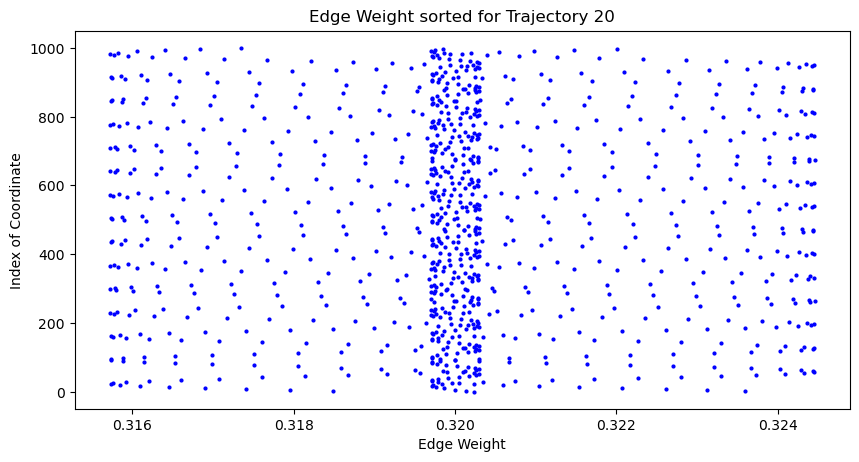

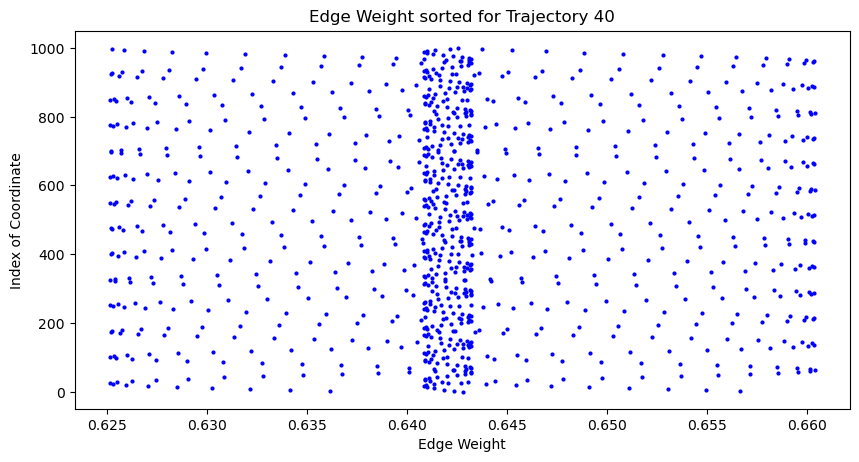

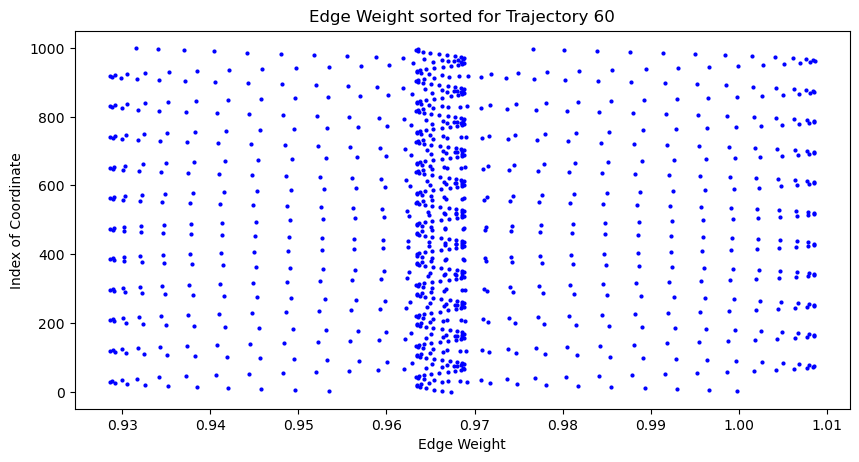

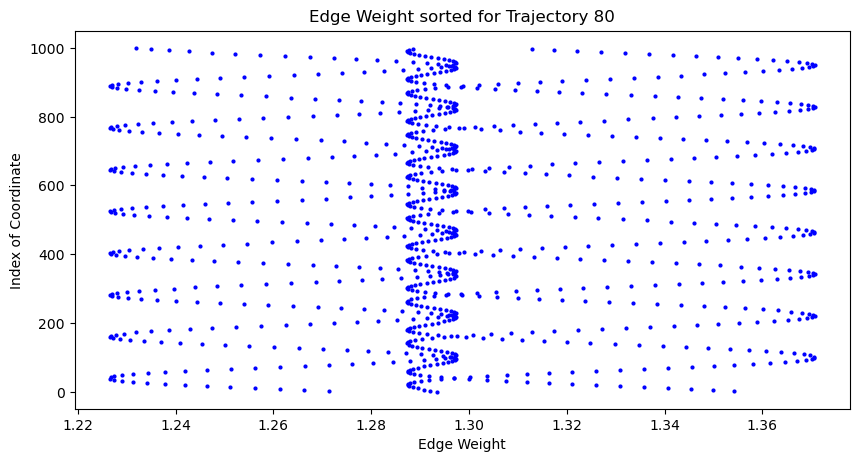

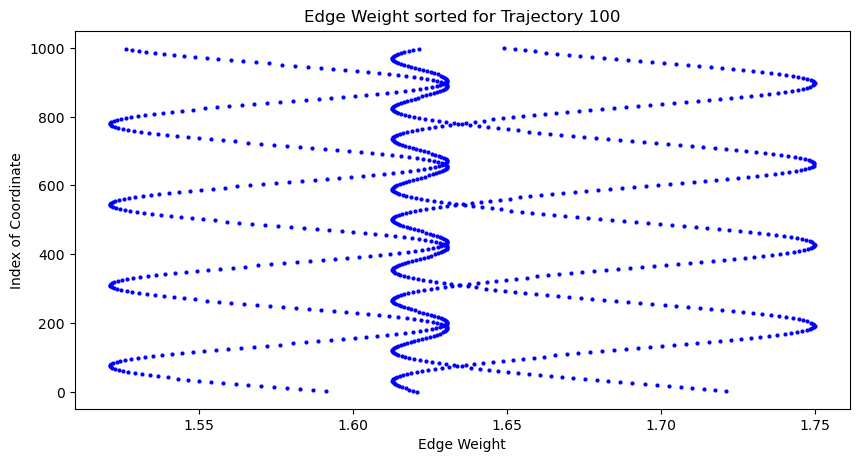

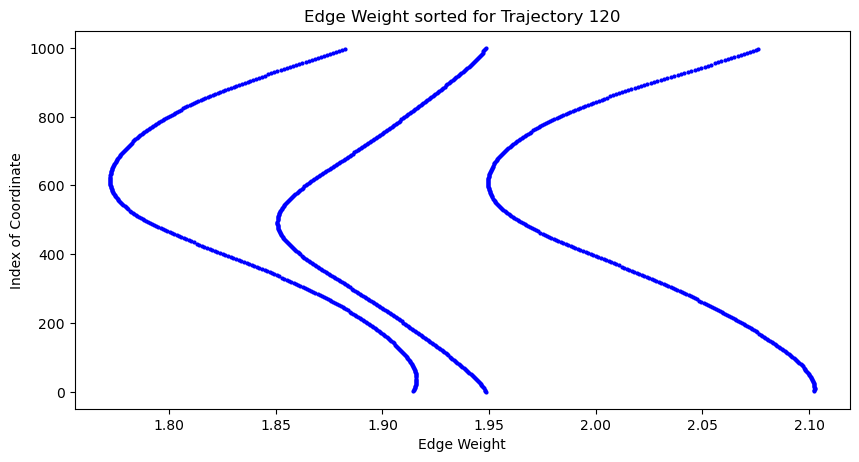

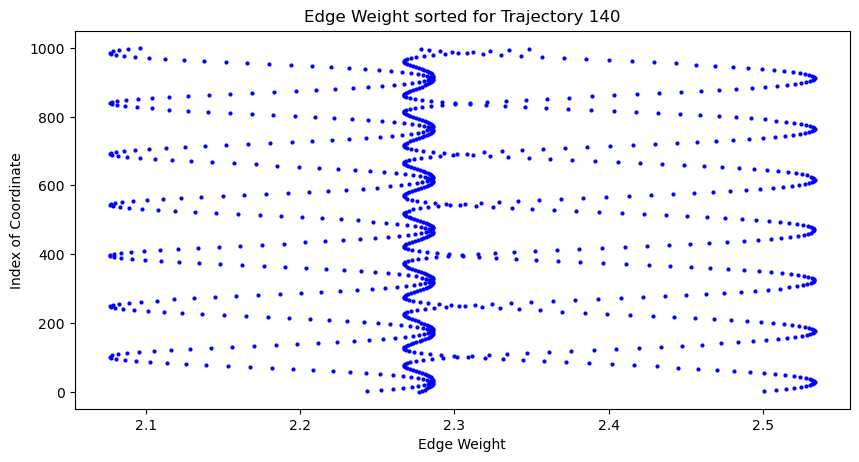

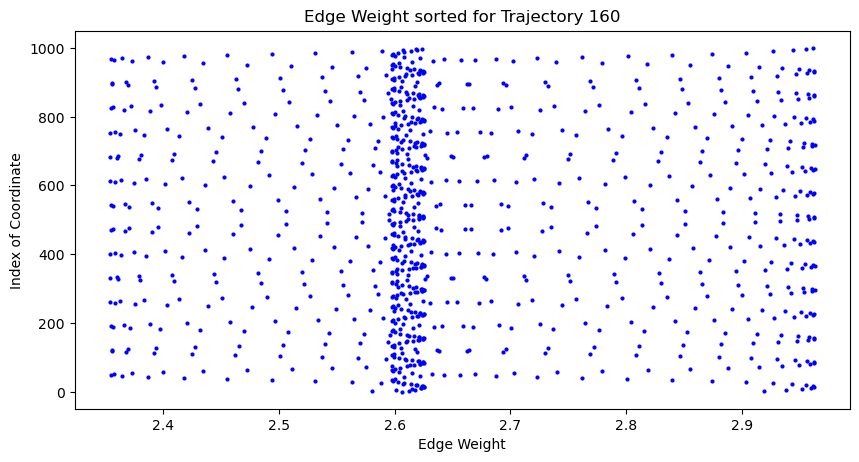

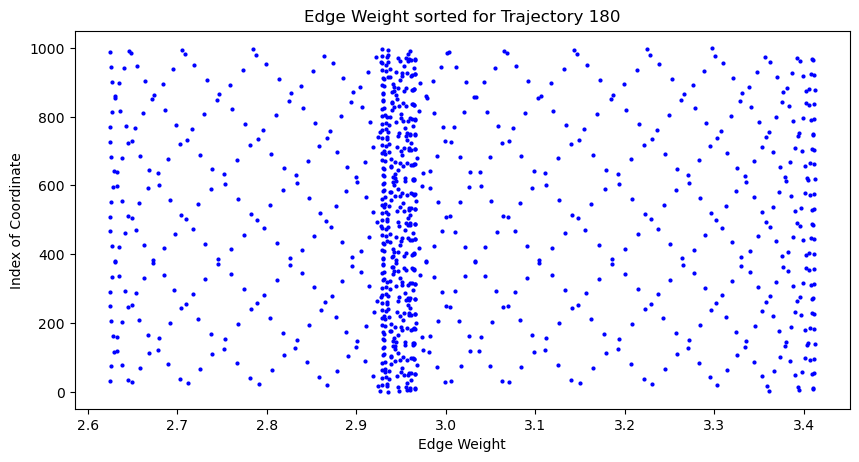

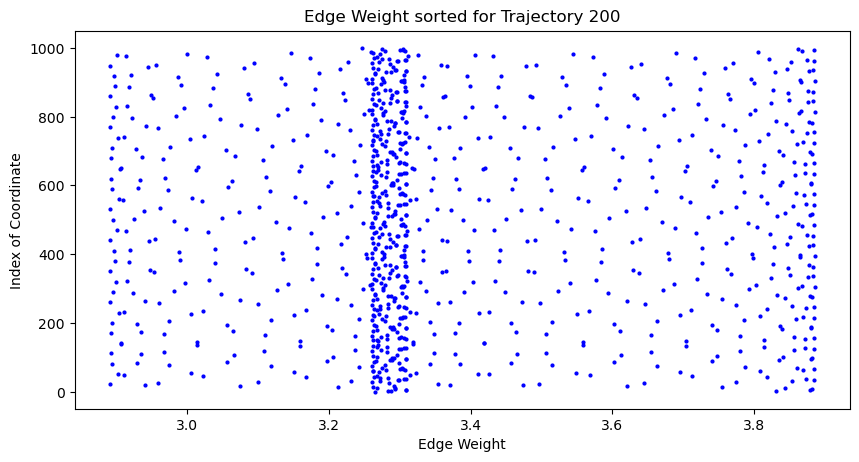

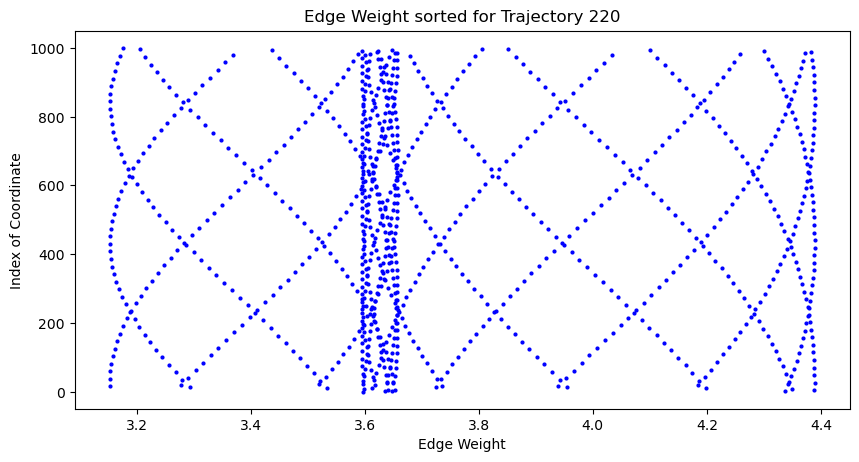

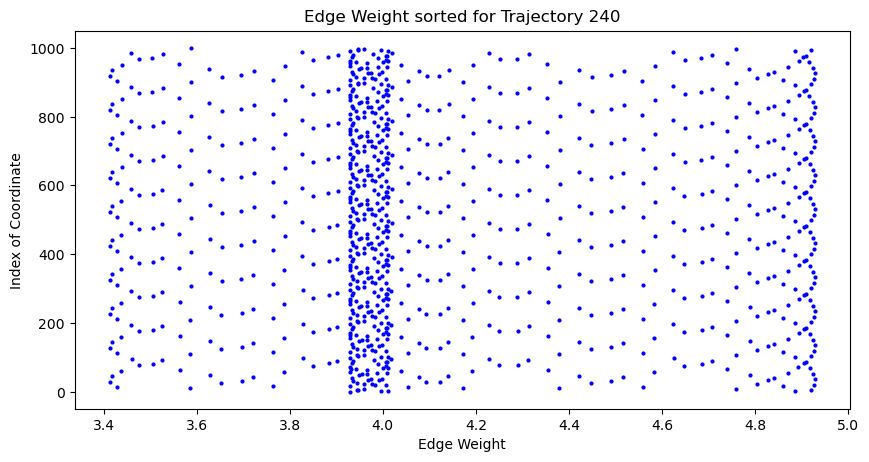

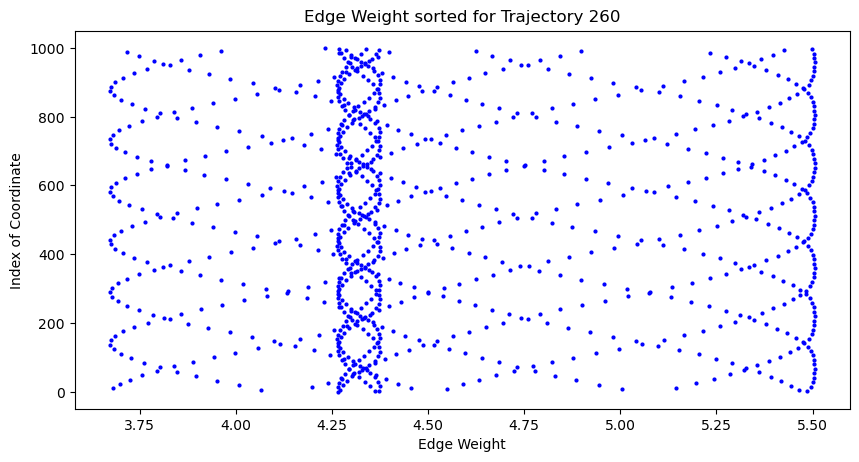

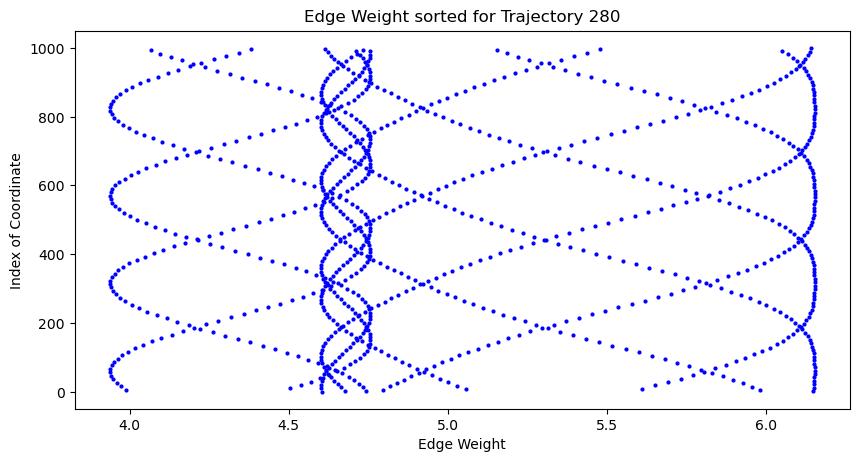

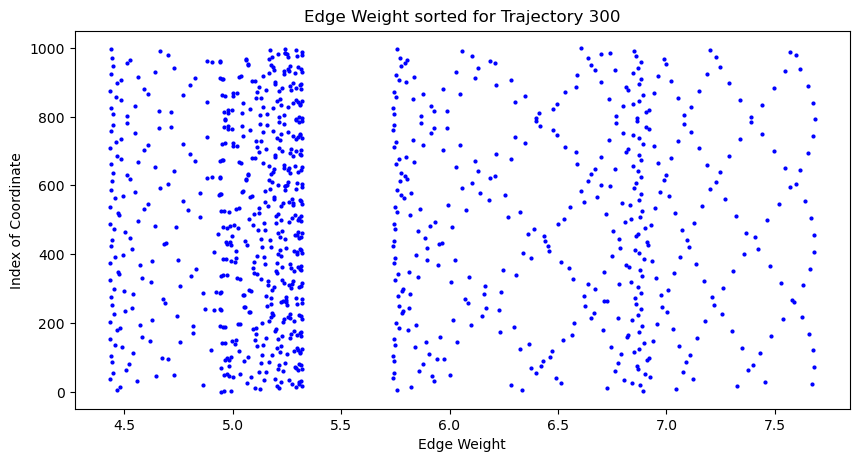

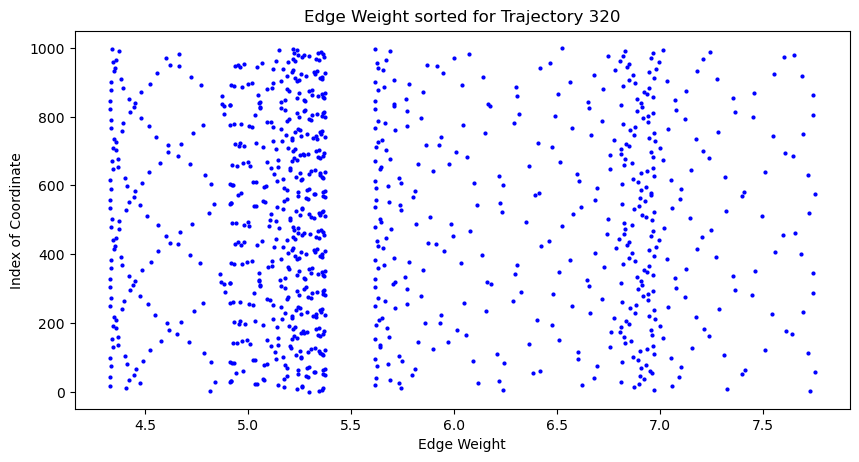

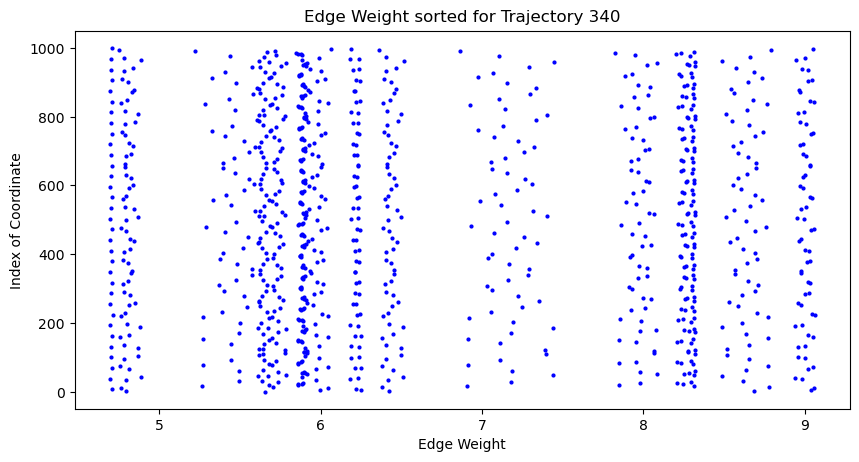

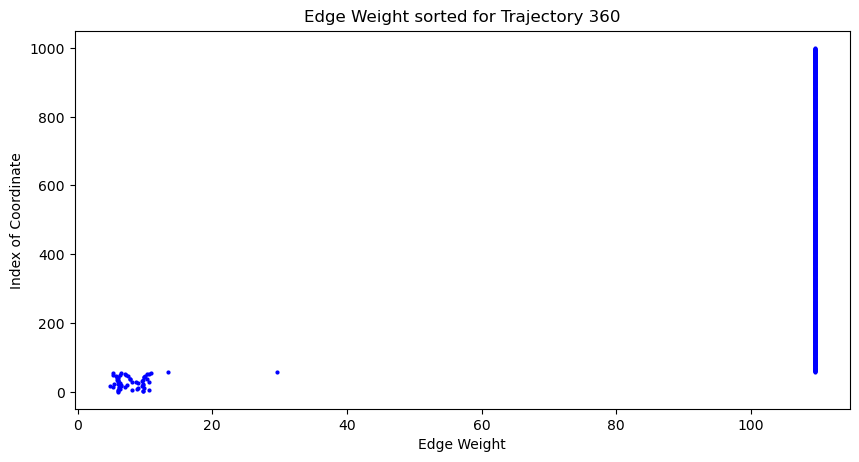

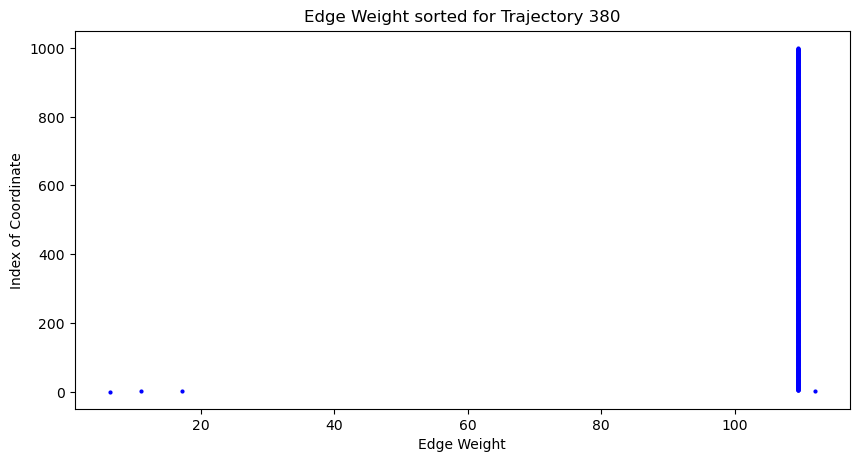

In [24]:
#plotting index from the sorted nodes 
#independant var: edge weight 
#dependant var: index

Dist_1 = get_dist(data)
print(type(Dist_1))
new_arr = [sorted(x) for x in Dist_1]
idx_arr = np.argsort(Dist_1)
print(idx_arr[1])

traj_list = np.array(range(400))
traj_list2 = traj_list[0::20]

for i in traj_list:
    #print(traj_list[i])
    if (i % 20) == 0:
        if i != 0:
            Dist_1.sort
            #print(Dist_1[i].sort())
            tpad = 7
            plt.figure(figsize=[10,5], dpi=100)
            plt.title('Edge Weight sorted for Trajectory %s' %i, pad=tpad) 
            plt.xlabel('Edge Weight') 
            plt.ylabel('Index of Coordinate') 
            plt.plot(new_arr[i], idx_arr[i], 'ob', markersize = 2)
            plt.savefig(os.path.join("/global/u2/m/mmeitz/FRNN/Traj_{0}_EW_IDXsorted.png".format(str(i).zfill(3))))
            plt.show()
            plt.close()
